###  Calculate Regression Statistics

In [137]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plb
import matplotlib.ticker as mtick
import scipy.stats as stats

In [141]:
combo8_df = pd.read_csv("Combined_Hosp_Drug_Util_v2.csv")
combo8_df.count()

Unnamed: 0                   1509
Zip                          1509
County                       1509
State                        1509
Year                         1509
Total Pop                    1509
Male Pop                     1509
Pct Male                     1509
Female Pop                   1509
Pct Female                   1509
Total Employable Pop         1509
Full Time Employed Pop       1509
Pct Full Time Employed       1509
Total Households             1509
Household Median Income      1509
Insurable Pop                1509
Insured Pop                  1509
Pct Insured                  1509
Uninsured Pop                1509
ADI State Rank               1509
ADI Natl Rank                1509
CA DOI Underserved Flag      1509
Tapestry Seg Nr              1509
Tapestry Seg Code            1509
Tapestry Seg Name            1509
Lifemode Code                1509
Lifemode Group               1509
AS Only                      1509
ED Only                      1509
Inpatient     

In [142]:
# Define variables from dataframe to use in regression analysis

# Independent Variables
Pct_FT_Employed = list(combo8_df['Pct Full Time Employed'])
Median_Income = list(combo8_df['Household Median Income'])
Pct_Insured = list(combo8_df['Pct Insured'])
Tapestry_Seg = list(combo8_df['Tapestry Seg Nr'])
Lifemode = list(combo8_df['Lifemode Code'])
ADI_State = list(combo8_df['ADI State Rank'])
ADI_Natl = list(combo8_df['ADI Natl Rank'])
Pct_Male = list(combo8_df['Pct Male'])
Opioid_Rx_per_1000 = list(combo8_df['Opioid Rx per 1,000'])
Opioid_Pop_per_1000 = list(combo8_df['Pop w Opioid Rx per 1,000'])

# Dependent Variables
C2_C4_per_1000 = list(combo8_df['C2-C4 per 1,000'])
C4_per_1000 = list(combo8_df['C4 per 1,000'])
C3_per_1000 = list(combo8_df['C3 per 1,000'])
C2_per_1000 = list(combo8_df['C2 per 1,000'])
IP_via_ED_per_1000 = list(combo8_df['IP via ED per 1,000'])
IP_per_1000 = list(combo8_df['IP per 1,000'])
ED_per_1000 = list(combo8_df['ED per 1,000'])
AS_per_1000 = list(combo8_df['AS per 1,000'])
Pct_IP_from_ED = list(combo8_df['Inpatient from ED']/combo8_df['Inpatient'])

# Population Sets
#CA_DOI_Underserved_Zips = list(combo8_df[combo8_df['CA DOI Underserved Flag']=='Y'])
#CA_DOI_Normal_Zips = list(combo8_df[combo8_df['CA DOI Underserved Flag']=='N'])

In [155]:
stats.pearsonr(ADI_State, Pct_FT_Employed)
#stats.ttest_ind(CA_DOI_Underserved_Zips, CA_DOI_Normal_Zips, equal_var=False)

(-0.25291368294412514, 1.880171816248957e-23)

In [149]:
# significant moderate to strong correlations (p<0.05)

stats.pearsonr(Opioid_Rx_per_1000, ED_per_1000)#(0.7902, 7.4e-323)
oped_coeff = '{:0.2f}'.format(stats.pearsonr(Opioid_Rx_per_1000, ED_per_1000)[0])
oped_pval = '{:.3e}'.format(stats.pearsonr(Opioid_Rx_per_1000, ED_per_1000)[1])

stats.pearsonr(Median_Income, Pct_Insured)  #(0.5419, 5.9732e-116)
incins_coeff = '{:0.2f}'.format(stats.pearsonr(Median_Income, Pct_Insured)[0])
incins_pval = '{:.3e}'.format(stats.pearsonr(Median_Income, Pct_Insured)[1])

stats.pearsonr(Median_Income, ED_per_1000)     #(-0.3363, 3.1078e-41)
inced_coeff = '{:0.2f}'.format(stats.pearsonr(Median_Income, ED_per_1000)[0])
inced_pval = '{:.3e}'.format(stats.pearsonr(Median_Income, ED_per_1000)[1])

stats.pearsonr(Median_Income, IP_via_ED_per_1000)  #(-0.3023, 2.9301e-33)
inciped_coeff = '{:0.2f}'.format(stats.pearsonr(Median_Income, IP_via_ED_per_1000)[0])
inciped_pval = '{:.3e}'.format(stats.pearsonr(Median_Income, IP_via_ED_per_1000)[1])

stats.pearsonr(Pct_FT_Employed, Opioid_Rx_per_1000)  #(-0.2963, 5.5846e-32)
empop_coeff = '{:0.2f}'.format(stats.pearsonr(Pct_FT_Employed, Opioid_Rx_per_1000)[0])
empop_pval = '{:.3e}'.format(stats.pearsonr(Pct_FT_Employed, Opioid_Rx_per_1000)[1])

stats.pearsonr(Median_Income, Opioid_Rx_per_1000) #(-0.2953, 9.4177e-32)
incop_coeff = '{:0.2f}'.format(stats.pearsonr(Median_Income, Opioid_Rx_per_1000)[0])
incop_pval = '{:.3e}'.format(stats.pearsonr(Median_Income, Opioid_Rx_per_1000)[1])


In [77]:
# significant, but too weak correlations (p<0.05, r2 < 0.3, -0.3)
stats.pearsonr(ADI_State, ED_per_1000)         #(0.2591, 1.3789e-24)
stats.pearsonr(Tapestry_Seg, ED_per_1000)      #(0.1915, 6.2519e-14)
stats.pearsonr(Pct_Male, ED_per_1000)          #(0.1943, 2.6181e-14)
stats.pearsonr(ADI_State, Opioid_Rx_per_1000)  #(0.1978, 8.8970e-15)
stats.pearsonr(ADI_State, IP_via_ED_per_1000)  #(0.1975, 9.7754e-15)
stats.pearsonr(Median_Income, IP_per_1000)     #(-0.1930, 3.8752e-14)
stats.pearsonr(ADI_State, Pct_IP_from_ED)      #(0.1203, 6.6731e-05)
stats.pearsonr(ADI_State, Opioid_Pop_per_1000) #(0.1201, 2.8861e-06)
stats.pearsonr(ADI_State, C2_C4_per_1000)      #(-0.1056, 0.0004)
stats.pearsonr(ADI_State, C2_per_1000)         #(-0.0880, 0.0035)
stats.pearsonr(ADI_State, C3_per_1000)         #(-0.1139, 0.0001)
stats.pearsonr(ADI_State, C4_per_1000)         #(-0.1164, 0.0001)
stats.pearsonr(ADI_Natl, AS_per_1000)          #(-0.0743, 0.0139)
stats.pearsonr(ADI_State, IP_per_1000)         #(0.0706, 0.0060)

# insignificant correlations (p>0.05)
stats.pearsonr(ADI_State, AS_per_1000)        #(-0.0581, 0.0547)

(0.010598147242533556, 0.6808053395975335)

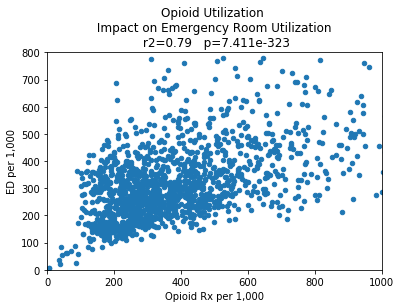

In [78]:
combo8_df.plot(x='Opioid Rx per 1,000', y='ED per 1,000', kind='scatter', xlim=(0,1000), ylim=(0,800),
               title=f'Opioid Utilization \n Impact on Emergency Room Utilization \n r2={oped_coeff}   p={oped_pval}')

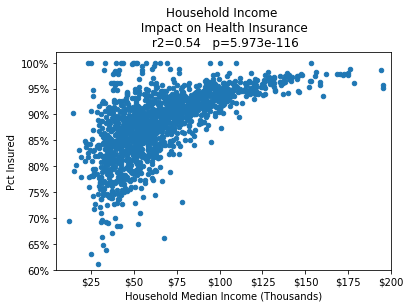

In [109]:
# convert Household Median Income to thousands for plot
combo8_df['Household Median Income (Thousands)'] = combo8_df['Household Median Income']/1000

ax=combo8_df.plot(x='Household Median Income (Thousands)', y='Pct Insured', kind='scatter', xlim=(5,200), ylim=(60,102),
               title=f'Household Income \n Impact on Health Insurance \n r2={incins_coeff}   p={incins_pval}')
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}%'))

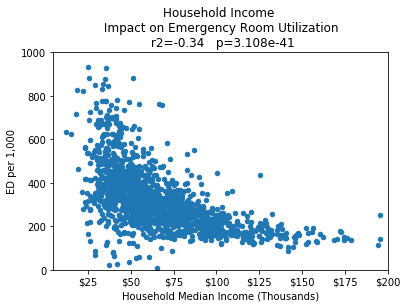

In [83]:
# convert Household Median Income to thousands for plot
combo8_df['Household Median Income (Thousands)'] = combo8_df['Household Median Income']/1000

ax=combo8_df.plot(x='Household Median Income (Thousands)', y='ED per 1,000', kind='scatter', xlim=(5,200), ylim=(0,1000),
               title=f'Household Income \n Impact on Emergency Room Utilization \n r2={inced_coeff}   p={inced_pval}')
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

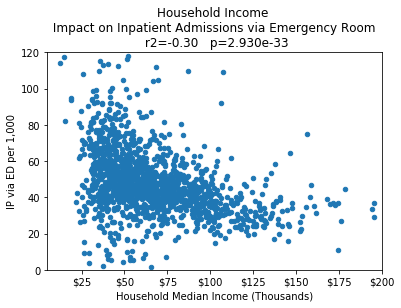

In [99]:
combo8_df['Household Median Income (Thousands)'] = combo8_df['Household Median Income']/1000
ax = combo8_df.plot(x='Household Median Income (Thousands)', y='IP via ED per 1,000', kind='scatter', xlim=(5,200), ylim=(0,120), 
                    title=f'Household Income \n Impact on Inpatient Admissions via Emergency Room \n r2={inciped_coeff}   p={inciped_pval}')
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))